In [26]:
import paddlets
print(paddlets.__version__)

1.1.0


## 内置数据集

In [27]:
from paddlets.datasets.repository import get_dataset, dataset_list
print(f"built-in datasets: {dataset_list()}")

built-in datasets: ['UNI_WTH', 'ETTh1', 'ETTm1', 'ECL', 'WTH', 'NAB_TEMP', 'psm_train', 'psm_test', 'BasicMotions_Train', 'BasicMotions_Test']


In [28]:
builtin_dataset = get_dataset('UNI_WTH')
print(type(builtin_dataset))

<class 'paddlets.datasets.tsdataset.TSDataset'>


<AxesSubplot:xlabel='date'>

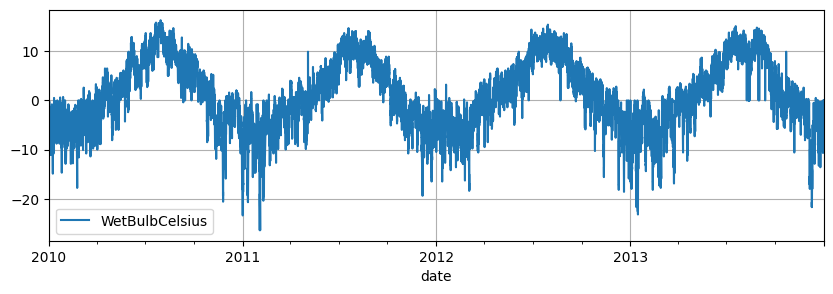

In [29]:
builtin_dataset.plot()

## 自定义数据集

In [30]:
import pandas as pd
import numpy as np
from paddlets import TSDataset

df = pd.read_csv("../../data/processed/wind-power-forecast/01.csv",
                 parse_dates=['DATATIME'],
                 infer_datetime_format=True,
                 dayfirst=True)
df.head()

,DATATIME,WINDSPEED,PREPOWER,WINDDIRECTION,TEMPERATURE,HUMIDITY,PRESSURE,"ROUND(A.WS,1)","ROUND(A.POWER,0)",YD15
0,2021-01-02 00:00:00,4.2,8432.0,345,-5.9,50,1014,3.7,7448.0,4044.0
1,2021-01-02 00:15:00,4.3,8177.0,348,-5.9,50,1014,3.3,5497.0,3512.0
2,2021-01-02 00:30:00,4.2,7959.0,352,-6.0,50,1014,3.3,5583.0,3242.0
3,2021-01-02 00:45:00,4.3,7740.0,356,-6.0,49,1014,3.0,3926.0,1667.0
4,2021-01-02 01:00:00,4.3,7522.0,0,-6.1,49,1014,2.5,468.0,204.0


In [79]:
df.drop_duplicates(subset=['DATATIME'], keep="first", inplace=True)

dataset = TSDataset.load_from_dataframe(
    df[-4*24*30:], 
    time_col='DATATIME',
    target_cols='YD15',
    observed_cov_cols=['WINDSPEED', 'PREPOWER',
        'ROUND(A.WS,1)', 'ROUND(A.POWER,0)'],
    freq='15min',
    fill_missing_dates=True
)
dataset.summary()

,YD15,WINDSPEED,PREPOWER,"ROUND(A.WS,1)","ROUND(A.POWER,0)"
missing,0.000000,0.000000,0.000000,0.000000,0.000000
count,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000
mean,17177.111806,5.074167,19320.180903,4.639965,17503.624306
std,20593.219776,2.327431,20011.570098,1.780059,21102.752305
min,-417.000000,0.000000,132.000000,0.200000,-203.000000
25%,0.000000,3.300000,4063.000000,3.200000,-57.250000
50%,9577.000000,5.000000,11702.000000,4.700000,9254.000000
75%,27553.250000,6.500000,26902.500000,5.700000,28222.000000
max,98617.000000,11.700000,78432.000000,12.100000,95748.000000


[2023-04-27 16:49:35,798] [paddlets.analysis.frequency_domain] [WARNING] It's suggested to assign a positive number to the fs parameter.


<module 'matplotlib.pyplot' from '/Users/guolianglu/Library/Python/3.8/lib/python/site-packages/matplotlib/pyplot.py'>

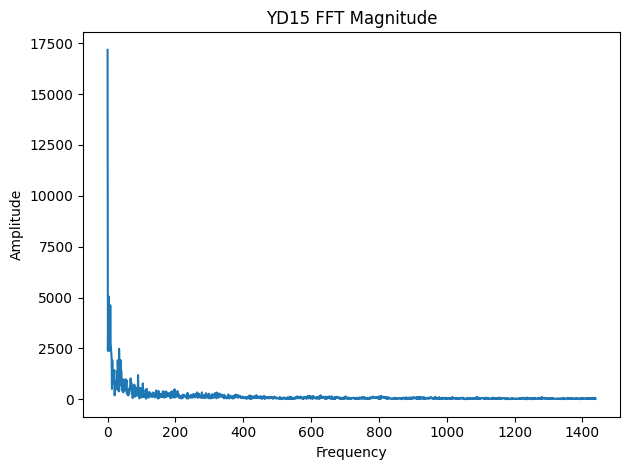

In [80]:
from paddlets.analysis import FFT
fft = FFT()
res = fft(dataset, columns='YD15')
fft.plot()

## 画图分析

<AxesSubplot:xlabel='DATATIME'>

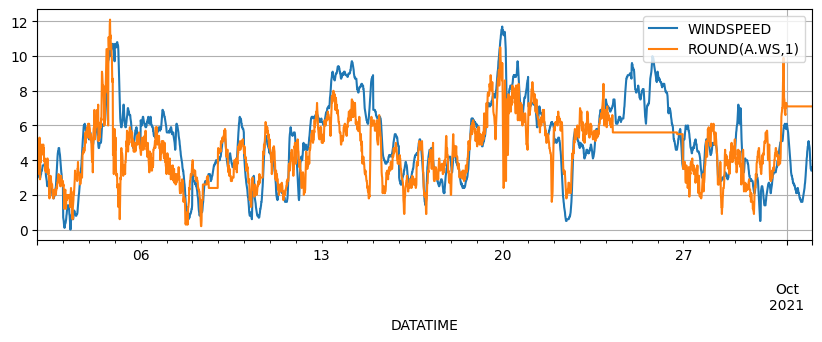

In [81]:
dataset.plot(['WINDSPEED', 'ROUND(A.WS,1)'])

<AxesSubplot:xlabel='DATATIME'>

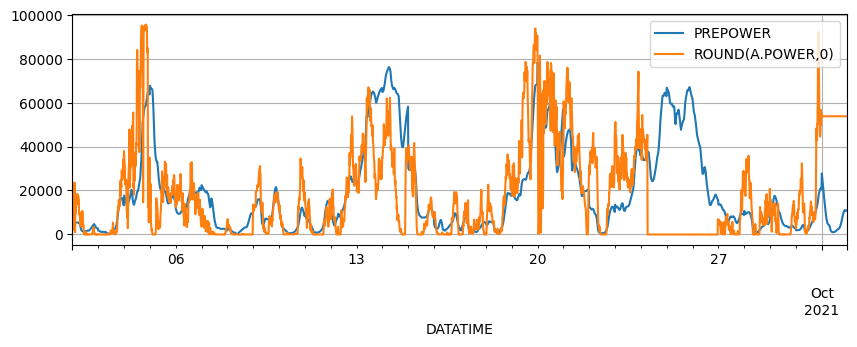

In [82]:
dataset.plot(['PREPOWER', 'ROUND(A.POWER,0)'])

<AxesSubplot:xlabel='DATATIME'>

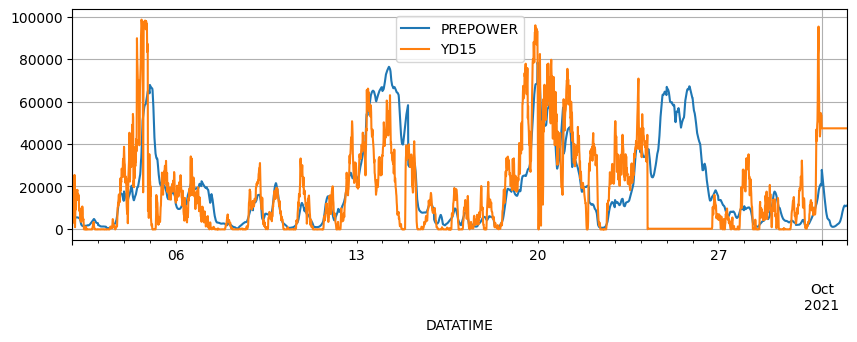

In [83]:
dataset.plot(['PREPOWER', 'YD15'])

<AxesSubplot:xlabel='DATATIME'>

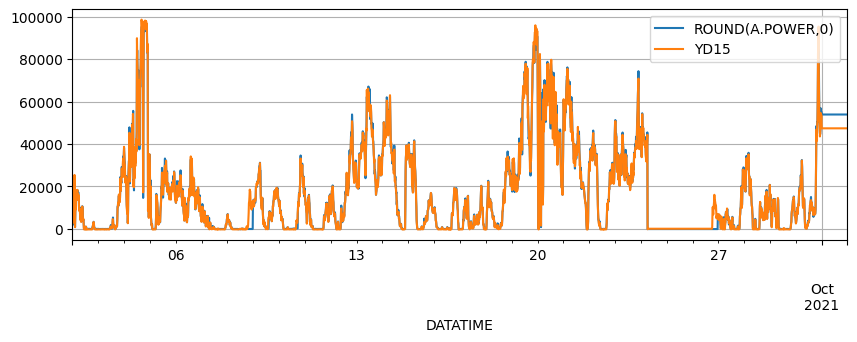

In [84]:
dataset.plot(['ROUND(A.POWER,0)', 'YD15'])

## 模型训练和预测

<AxesSubplot:xlabel='DATATIME'>

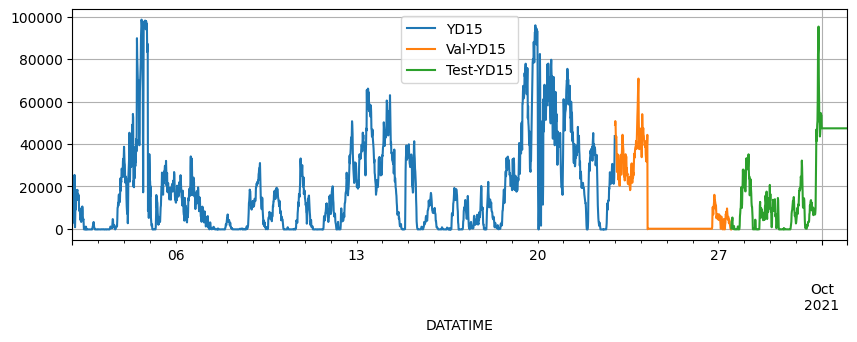

In [85]:
train_dataset, val_test_dataset = dataset.split(0.7)
val_dataset, test_dataset = val_test_dataset.split(0.5)
train_dataset.plot(add_data=[val_dataset,test_dataset], labels=['Val', 'Test'])

In [86]:
from paddlets.models.forecasting import LSTNetRegressor

lstm = LSTNetRegressor(
    in_chunk_len = 4 * 24 * 5,
    out_chunk_len = 24 * 4,
    max_epochs=10,
    optimizer_params= dict(learning_rate=1e-3),
)

In [87]:
lstm.fit(train_dataset, val_dataset)

[2023-04-27 16:49:41,773] [paddlets] [ERROR] ValueError: if time_window[1] (431) <= len(TSDataset.target) - 1 (431), then 575 <= time_window[0] (575) <= time_window[1] (431) <= len(TSDataset.target) - 1 (431) must be True.


ValueError: if time_window[1] (431) <= len(TSDataset.target) - 1 (431), then 575 <= time_window[0] (575) <= time_window[1] (431) <= len(TSDataset.target) - 1 (431) must be True.